In [31]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt


In [40]:
image = cv2.imread("./assets/colab/image_sportsfan.jpg")
with open('./assets/colab/bbox_sportsfan.json') as jsonfile:
    bbox = json.load(jsonfile)['bbox']

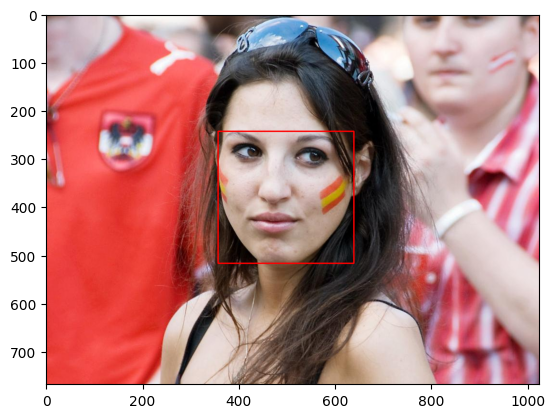

In [41]:
# Draw the bounding box
# cv2.rectangle(image, bbox, (0, 0, 255), 2)
cv2.rectangle(image, (357, 243, 283, 275), (0, 0, 255), 2)
# Display the image
cv2.imshow('image', image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [58]:

# Face에 대한 bounding box를 찾는데, 오작동이 조금 많은 편이다. 이 부분은 좀 더 좋은 방법을 찾아 개선할 필요가 있다.
# 아니면, face의 위치(좌표)를 고정시키는 것도 한 방법이겠다. 
def get_face_bbox(image):
    # Load the pre-trained Haar Cascade classifier for faces
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the image and convert it to grayscale
    if(image is None):
        image = cv2.imread('./assets/colab/image_sportsfan.jpg')
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)
    
    return faces
    # Draw a rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.show()
    


In [60]:
from spiga.inference.config import ModelConfig
from spiga.inference.framework import SPIGAFramework
import copy
from spiga.demo.visualize.plotter import Plotter

# Process image
dataset = 'wflw'
processor = SPIGAFramework(ModelConfig(dataset))


SPIGA model loaded!


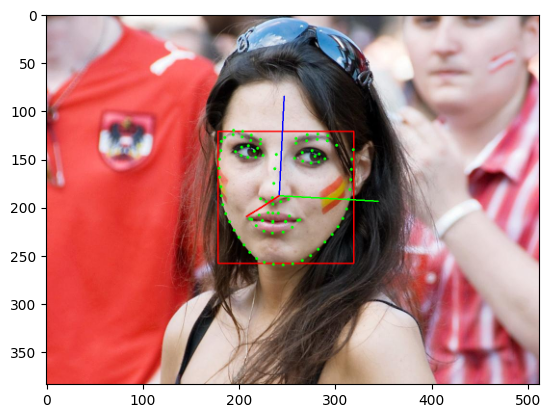

In [46]:

features = processor.inference(image, [bbox])

# Prepare variables
x0,y0,w,h = bbox
canvas = copy.deepcopy(image)
landmarks = np.array(features['landmarks'][0])
headpose = np.array(features['headpose'][0])

# Plot features
plotter = Plotter()
canvas = plotter.landmarks.draw_landmarks(canvas, landmarks)
canvas = plotter.hpose.draw_headpose(canvas, [x0,y0,x0+w,y0+h], headpose[:3], headpose[3:], euler=True)

# Show image results
(h, w) = canvas.shape[:2]
canvas = cv2.resize(canvas, (512, int(h*512/w)))


plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.show()



In [69]:
import cv2
from IPython.display import clear_output, Image, display
from io import BytesIO

import PIL.Image

def showarray(a, fmt='jpeg'):
    a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

# Open a video capture object for the default camera (camera index 0)
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame was captured successfully
    if not ret:
        print("Failed to capture frame")
        break
    
    # Display the captured frame
    clear_output(wait=True)
    fbbox=get_face_bbox(frame)
    # showarray(frame)


    image=frame
    
    if(len(fbbox)>0):
        bbox=fbbox[0]
        features = processor.inference(image, [bbox])

        # Prepare variablesd
        x0,y0,w,h = bbox
        canvas = copy.deepcopy(image)
        landmarks = np.array(features['landmarks'][0])
        headpose = np.array(features['headpose'][0])

        # Plot features
        plotter = Plotter()
        canvas = plotter.landmarks.draw_landmarks(canvas, landmarks)
        canvas = plotter.hpose.draw_headpose(canvas, [x0,y0,x0+w,y0+h], headpose[:3], headpose[3:], euler=True)


        # Show image results
        (h, w) = canvas.shape[:2]
        canvas = cv2.resize(canvas, (512, int(h*512/w)))

        showarray(canvas)


    # Check if the user pressed the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and destroy all windows
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 